In [1]:
import pandas as pd

df = pd.read_csv('./csv/카드총액증감율09~22.csv')
df

,소비유형코드,전자상거래/통신판매,식료품,의류/잡화,연료,가구/가전,의료/보건,자동차,여행/교통,스포츠/오락/여가,서적/문구,교육,숙박,음식점,공과금/개인 및 전문 서비스,금융/보험
0,2009/12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010/01,-9.1,-10.7,-18.0,-9.6,-17.8,-1.8,-42.6,-6.4,-17.8,-14.5,-7.1,-12.8,-13.7,4.6,-11.0
2,2010/02,-6.9,22.1,0.3,-4.0,-0.7,-5.8,2.1,-7.5,-9.0,-6.2,1.2,-19.1,-9.7,-7.9,-4.2
3,2010/03,15.7,-14.4,15.8,14.1,46.0,13.6,16.7,10.6,32.1,54.4,16.4,11.7,23.0,3.2,24.2
4,2010/04,-8.5,-0.7,0.8,0.3,-24.1,-3.3,-14.3,8.6,0.3,-30.9,-15.8,20.8,-2.9,3.4,-14.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,2021/12,1.6,2.7,-5.1,-0.1,-11.4,5.5,4.7,-19.6,-21.0,18.6,4.0,-0.2,-8.6,8.7,5.3
145,2022/01,-0.3,28.4,-9.7,-1.9,11.3,2.2,-22.4,3.5,-12.7,-5.1,3.2,-4.0,-6.1,19.6,-7.0
146,2022/02,-9.6,-37.9,-18.8,-10.7,-7.5,-12.7,-0.2,-16.0,-7.9,-16.4,-8.3,-7.1,-17.4,-24.0,-5.0
147,2022/03,13.2,11.4,23.5,20.3,4.2,15.9,12.2,26.1,39.8,40.3,10.7,-8.8,21.5,8.1,18.0


In [2]:
df.rename(columns={'소비유형코드' : '날짜'}, inplace=True)
# 날짜 컬럼 "/" 제거
df["날짜"] = df["날짜"].str.replace("/", "")

# 날짜 컬럼 int 타입으로 변환
df["날짜"] = df["날짜"].astype(int)

# 날짜 데이터타임 변환 후 인덱스 변환
df["날짜"] = pd.to_datetime(df["날짜"], format='%Y%m')
df["날짜"] = df["날짜"].dt.strftime('%Y-%m')
df = df.iloc[1:]
df.set_index('날짜', inplace=True)

In [3]:
# 컬럼 맞추기
df.columns = df.columns.str.replace(' ','')
df.columns

Index(['전자상거래/통신판매', '식료품', '의류/잡화', '연료', '가구/가전', '의료/보건', '자동차', '여행/교통',
       '스포츠/오락/여가', '서적/문구', '교육', '숙박', '음식점', '공과금/개인및전문서비스', '금융/보험'],
      dtype='object')

In [4]:
socell_df = pd.read_csv('./csv/소매판매지수_09~22.csv')
socell_df = socell_df[['시점','총지수']]
socell_df.rename(columns={'시점' : '날짜'}, inplace=True)
socell_df.rename(columns={'총지수' : '소매판매지수'}, inplace=True)
socell_df['날짜'] = socell_df['날짜'].astype(str)
socell_df["날짜"][socell_df["날짜"].str.endswith(".1")] = socell_df["날짜"][socell_df["날짜"].str.endswith(".1")]+"0"
socell_df["날짜"] = pd.to_datetime(socell_df["날짜"], format="%Y.%m")
socell_df["날짜"] = socell_df["날짜"].dt.strftime('%Y-%m')
socell_df['소매판매지수_증감률'] = socell_df['소매판매지수'].pct_change()
socell_df = socell_df[["날짜","소매판매지수_증감률"]]
socell_df = socell_df.iloc[1:]
socell_df.set_index('날짜', inplace=True)
socell_df

C:\Users\82104\AppData\Local\Temp\ipykernel_7564\1273129595.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  socell_df["날짜"][socell_df["날짜"].str.endswith(".1")] = socell_df["날짜"][socell_df["날짜"].str.endswith(".1")]+"0"


,소매판매지수_증감률
날짜,
2010-01,-0.095082
2010-02,-0.016908
2010-03,0.054054
2010-04,-0.018648
2010-05,0.042755
...,...
2021-12,0.020048
2022-01,-0.076258
2022-02,-0.081702


In [5]:
full = pd.read_csv('./USD_KRW 내역.csv', encoding='utf-8')
full.columns = full.columns.str.replace(' ','')
full.columns = full.columns.str.replace('%','')
full["변동"] = full["변동"].str.replace("%", "")
full["변동"] = full["변동"].astype(float)
# full['종가'] = full['종가'].apply(lambda x: float(x))
# full = float(full['종가'].str.strip(','))
full = full[['날짜','종가','변동']]
full["날짜"] = pd.to_datetime(full["날짜"], format="%Y-%m-%d")
full["날짜"] = full["날짜"].dt.strftime('%Y-%m')
full.set_index('날짜', inplace=True)
full

,종가,변동
날짜,,
2010-01,1158.90,-0.62
2010-02,1160.00,0.09
2010-03,1132.80,-2.34
2010-04,1108.50,-2.15
2010-05,1202.12,8.45
...,...,...
2021-12,1187.96,0.44
2022-01,1204.63,1.40
2022-02,1200.12,-0.37


In [6]:
import numpy as np

smp = pd.read_csv('./csv/HOME_전력거래_계통한계가격_가중평균SMP.csv',encoding='cp949')
smp.rename(columns={'기간' : '날짜'}, inplace=True)
smp["날짜"] = pd.to_datetime(smp["날짜"], format="%Y-%m-%d")
smp["날짜"] = smp["날짜"].dt.strftime('%Y-%m')
smp['육지_등락률'] = smp['육지'].pct_change()
smp['제주_등락률'] = smp['제주'].pct_change()
smp['통합_등락률'] = smp['통합'].pct_change()
smp = smp.replace([np.inf, -np.inf], np.nan)
smp = smp.iloc[1:]
smp = smp.fillna(0)
smp.set_index('날짜', inplace=True)
smp

,육지,제주,통합,육지_등락률,제주_등락률,통합_등락률
날짜,,,,,,
2010-01,122.28,160.33,122.58,0.000000,0.000000,0.049756
2010-02,120.21,157.70,120.52,-0.016928,-0.016404,-0.016805
2010-03,120.55,159.52,120.88,0.002828,0.011541,0.002987
2010-04,115.15,154.78,115.48,-0.044795,-0.029714,-0.044672
2010-05,115.33,155.82,115.66,0.001563,0.006719,0.001559
...,...,...,...,...,...,...
2021-12,142.46,175.72,142.81,0.123236,0.173266,0.123957
2022-01,153.82,206.86,154.42,0.079742,0.177214,0.081297
2022-02,196.93,229.85,197.32,0.280263,0.111138,0.277814


In [7]:
bbl = pd.read_csv('./csv/국제유가_도입현황_20220828154445.csv', encoding='cp949')
bbl.rename(columns={'시점' : '날짜'}, inplace=True)
bbl["날짜"] = bbl["날짜"].astype(str)
bbl["날짜"][bbl["날짜"].str.endswith(".1")] = bbl["날짜"][bbl["날짜"].str.endswith(".1")]+"0"
bbl["날짜"] = pd.to_datetime(bbl["날짜"], format="%Y.%m")
bbl["날짜"] = bbl["날짜"].dt.strftime('%Y-%m')
bbl['국제유가_등락률'] = bbl['국제유가(Dubai) (US$/배럴)'].pct_change()
bbl['도입단가_등락률'] = bbl['도입단가 (US$/배럴)'].pct_change()
bbl['도입물량_등락률'] = bbl['도입물량 (백만배럴)'].pct_change()
bbl.set_index('날짜', inplace=True)
bbl = bbl.iloc[1:]
bbl

C:\Users\82104\AppData\Local\Temp\ipykernel_7564\2683139137.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bbl["날짜"][bbl["날짜"].str.endswith(".1")] = bbl["날짜"][bbl["날짜"].str.endswith(".1")]+"0"


,국제유가(Dubai) (US$/배럴),도입단가 (US$/배럴),도입물량 (백만배럴),국제유가_등락률,도입단가_등락률,도입물량_등락률
날짜,,,,,,
2010-01,58.2,78.1,74.5,0.056261,-0.006361,0.062767
2010-02,51.2,73.5,69.7,-0.120275,-0.058899,-0.064430
2010-03,51.2,77.3,66.3,0.000000,0.051701,-0.048780
2010-04,58.3,83.8,69.6,0.138672,0.084088,0.049774
2010-05,63.9,84.9,75.3,0.096055,0.013126,0.081897
...,...,...,...,...,...,...
2021-12,73.2,81.6,86.9,-0.088418,-0.009709,0.080846
2022-01,83.2,79.1,94.8,0.136612,-0.030637,0.090909
2022-02,92.4,88.1,79.3,0.110577,0.113780,-0.163502


In [9]:
total_df = pd.merge(df['연료'],socell_df, how='left', right_index=True, left_index=True)
total_df1 = pd.merge(total_df, full, how='left', right_index=True, left_index=True)
total_df2 = pd.merge(total_df1, smp, how='left', right_index=True, left_index=True)
total_df3 = pd.merge(total_df2, bbl, how='left', right_index=True, left_index=True)
total_df3

,연료,소매판매지수_증감률,종가,변동,육지,제주,통합,육지_등락률,제주_등락률,통합_등락률,국제유가(Dubai) (US$/배럴),도입단가 (US$/배럴),도입물량 (백만배럴),국제유가_등락률,도입단가_등락률,도입물량_등락률
날짜,,,,,,,,,,,,,,,,
2010-01,-9.6,-0.095082,1158.90,-0.62,122.28,160.33,122.58,0.000000,0.000000,0.049756,58.2,78.1,74.5,0.056261,-0.006361,0.062767
2010-02,-4.0,-0.016908,1160.00,0.09,120.21,157.70,120.52,-0.016928,-0.016404,-0.016805,51.2,73.5,69.7,-0.120275,-0.058899,-0.064430
2010-03,14.1,0.054054,1132.80,-2.34,120.55,159.52,120.88,0.002828,0.011541,0.002987,51.2,77.3,66.3,0.000000,0.051701,-0.048780
2010-04,0.3,-0.018648,1108.50,-2.15,115.15,154.78,115.48,-0.044795,-0.029714,-0.044672,58.3,83.8,69.6,0.138672,0.084088,0.049774
2010-05,-1.7,0.042755,1202.12,8.45,115.33,155.82,115.66,0.001563,0.006719,0.001559,63.9,84.9,75.3,0.096055,0.013126,0.081897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12,-0.1,0.020048,1187.96,0.44,142.46,175.72,142.81,0.123236,0.173266,0.123957,73.2,81.6,86.9,-0.088418,-0.009709,0.080846
2022-01,-1.9,-0.076258,1204.63,1.40,153.82,206.86,154.42,0.079742,0.177214,0.081297,83.2,79.1,94.8,0.136612,-0.030637,0.090909
2022-02,-10.7,-0.081702,1200.12,-0.37,196.93,229.85,197.32,0.280263,0.111138,0.277814,92.4,88.1,79.3,0.110577,0.113780,-0.163502


c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


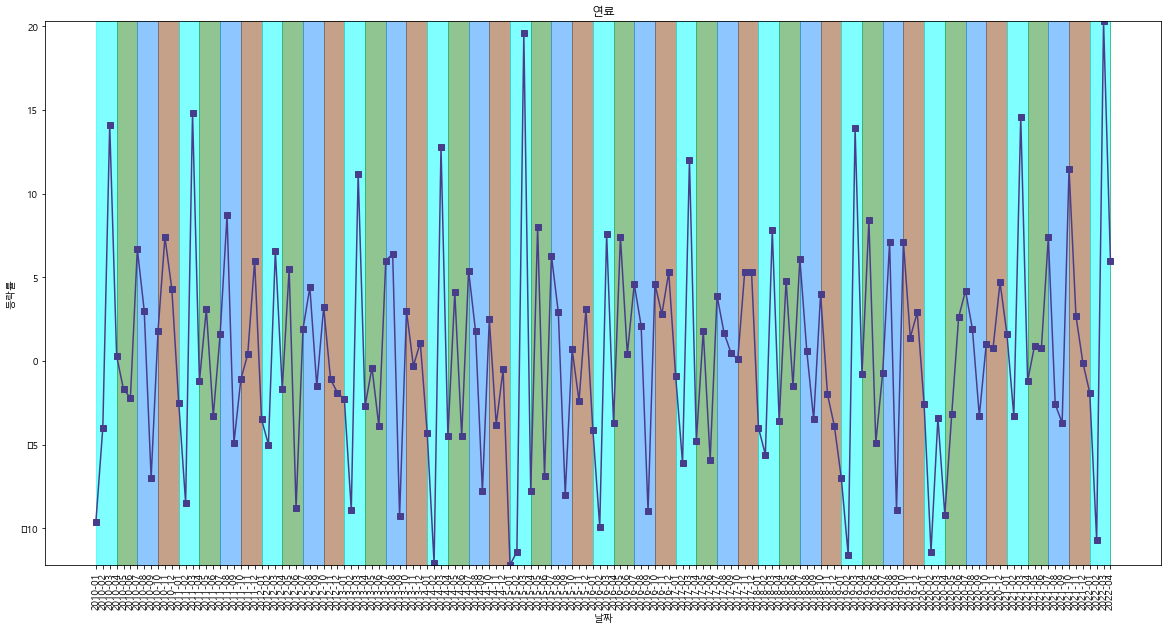

In [10]:
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Malgun Gothic"

plt.figure(figsize=(20,10))
plt.xticks(rotation=90)

x = total_df1.index
y = total_df1["연료"]

ymin, ymax = plt.ylim([total_df1["연료"].min(), total_df1["연료"].max()])

plt.fill_between(x[0:4], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[3:7], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[6:10], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[9:13], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[12:16], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[15:19], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[18:22], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[21:25], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[24:28], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[27:31], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[30:34], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[33:37], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[36:40], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[39:43], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[42:46], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[45:49], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[48:52], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[51:55], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[54:58], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[57:61], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[60:64], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[63:67], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[66:70], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[69:73], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[72:76], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[75:79], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[78:82], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[81:85], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[84:88], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[87:91], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[90:94], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[93:97], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[96:100], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[99:103], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[102:106], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[105:109], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[108:112], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[111:115], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[114:118], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[117:121], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[120:124], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[123:127], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[126:130], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[129:133], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[132:136], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[135:139], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[138:142], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[141:145], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[144:148], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[147:151], ymin, ymax, color='forestgreen', alpha=0.5)

plt.plot(total_df1["연료"], color='darkslateblue',marker='s')

plt.title("연료")
plt.xlabel("날짜")
plt.ylabel("등락률")
plt.show() 

c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<AxesSubplot:>

c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


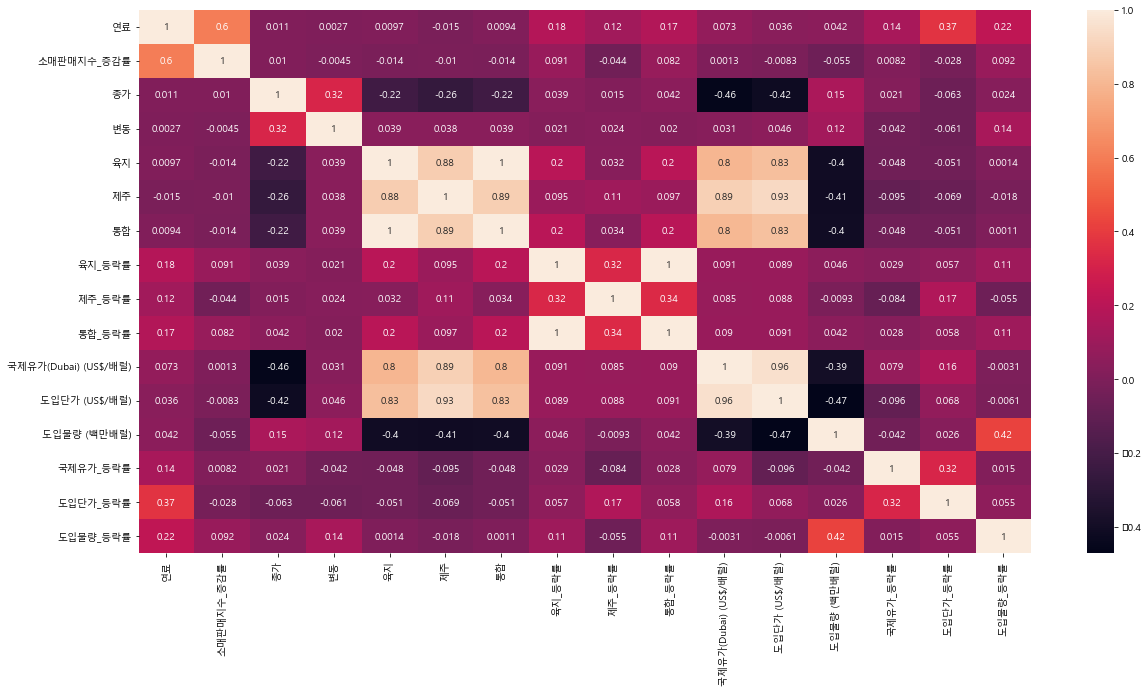

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Malgun Gothic"
plt.figure(figsize=(20,10))
sns.heatmap(total_df3.corr(),annot=True)

In [12]:
total_df3 = total_df3.reset_index('날짜')
df_bbl = total_df3[['날짜','연료','소매판매지수_증감률','도입단가_등락률']]

In [13]:
month_df = df_bbl.copy()
month_df["날짜"] = month_df["날짜"].astype(str)
# 동월 전체 평균
month_df["연료"][month_df["날짜"].str.endswith("12")].mean()

2.1916666666666664

In [14]:
# 각 동월 전체 평균 리스트 저장

month_list = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]
month_mean = []
for i in month_list:
    month_mean.append(month_df["연료"][month_df["날짜"].str.endswith(i)].mean())
month_mean

[-4.1,
 -8.346153846153847,
 11.684615384615386,
 -2.684615384615385,
 3.2249999999999996,
 -3.1750000000000003,
 4.45,
 3.1666666666666665,
 -5.533333333333332,
 3.1999999999999997,
 0.9333333333333336,
 2.1916666666666664]

In [15]:
# "동월_평균_등락률" 컬럼 생성 및 값 저장

month_df["동월_평균_등락률"] = ""
for i in month_list:
        month_df["동월_평균_등락률"][month_df["날짜"].str.endswith(i)]  = month_df["연료"][month_df["날짜"].str.endswith(i)].mean()
month_df.head(13)

C:\Users\82104\AppData\Local\Temp\ipykernel_7564\1645186813.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_df["동월_평균_등락률"][month_df["날짜"].str.endswith(i)]  = month_df["연료"][month_df["날짜"].str.endswith(i)].mean()


,날짜,연료,소매판매지수_증감률,도입단가_등락률,동월_평균_등락률
0,2010-01,-9.6,-0.095082,-0.006361,-4.1
1,2010-02,-4.0,-0.016908,-0.058899,-8.346154
2,2010-03,14.1,0.054054,0.051701,11.684615
3,2010-04,0.3,-0.018648,0.084088,-2.684615
4,2010-05,-1.7,0.042755,0.013126,3.225
5,2010-06,-2.2,-0.019362,-0.063604,-3.175
6,2010-07,6.7,0.013937,-0.026415,4.45
7,2010-08,3.0,-0.038946,-0.036176,3.166667
8,2010-09,-7.0,0.067938,0.018767,-5.533333
9,2010-10,1.8,0.012277,0.009211,3.2


In [16]:
# 동월별 양수 음수 등락률 평균값
import numpy as np

plus = [11.684615, 3.225, 4.45, 3.166667, 3.2, 0.933333, 2.191667]
minus = [-4.1, -8.346154, -2.684615, -3.175, -5.533333]

# 평균 구하기
average_plus = np.mean(plus)
average_minus = np.mean(minus)

In [29]:
print(average_plus)
print(average_minus)

4.121611714285715
-4.7678204


In [18]:
# "전체_평균_대비" 컬럼 생성 및 값 저장

month_df["전체_평균_대비"] = ""

# 동월 평균 등락률이 전체 평균 보다 높거나 같으면 1, 낮으면 0
for i in range(0, 148):
    if month_df.loc[i, "동월_평균_등락률"] >= 0:
        if month_df.loc[i, "동월_평균_등락률"] >= average_plus:
            month_df.loc[i, "전체_평균_대비"] = 1
        else:
            month_df.loc[i, "전체_평균_대비"] = 0
    elif month_df.loc[i, "동월_평균_등락률"] < 0:
        if month_df.loc[i, "동월_평균_등락률"] >= average_minus:
            month_df.loc[i, "전체_평균_대비"] = 1
        else:
            month_df.loc[i, "전체_평균_대비"] = 0

month_df.head(12)

,날짜,연료,소매판매지수_증감률,도입단가_등락률,동월_평균_등락률,전체_평균_대비
0,2010-01,-9.6,-0.095082,-0.006361,-4.1,1
1,2010-02,-4.0,-0.016908,-0.058899,-8.346154,0
2,2010-03,14.1,0.054054,0.051701,11.684615,1
3,2010-04,0.3,-0.018648,0.084088,-2.684615,1
4,2010-05,-1.7,0.042755,0.013126,3.225,0
5,2010-06,-2.2,-0.019362,-0.063604,-3.175,1
6,2010-07,6.7,0.013937,-0.026415,4.45,1
7,2010-08,3.0,-0.038946,-0.036176,3.166667,0
8,2010-09,-7.0,0.067938,0.018767,-5.533333,0
9,2010-10,1.8,0.012277,0.009211,3.2,0


In [19]:
df_bbl["동월_평균_등락률"] = month_df["동월_평균_등락률"]
df_bbl["전체_평균_대비"] = month_df["전체_평균_대비"]

C:\Users\82104\AppData\Local\Temp\ipykernel_7564\3361517916.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bbl["동월_평균_등락률"] = month_df["동월_평균_등락률"]
C:\Users\82104\AppData\Local\Temp\ipykernel_7564\3361517916.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bbl["전체_평균_대비"] = month_df["전체_평균_대비"]


In [20]:
df_bbl.describe()

,연료,소매판매지수_증감률,도입단가_등락률
count,148.000000,148.000000,148.000000
mean,0.383108,0.003218,0.006442
std,6.370781,0.053567,0.087696
min,-12.200000,-0.125224,-0.357333
25%,-3.725000,-0.034215,-0.026234
50%,0.350000,0.006158,0.007658
75%,4.450000,0.033637,0.052187
max,20.300000,0.162325,0.398577


In [25]:
pd.options.display.max_rows = None

In [31]:
import numpy as np

df_bbl["날짜"] = df_bbl["날짜"].astype(str)
df_bbl["소비"] = ""

for i in range(0, 13):
    for j in range(12, 148):
        if df_bbl.loc[i, "날짜"].endswith("03"):
            df_bbl.loc[i, "소비"] = 1
        else:
            if df_bbl.loc[i,"연료"] > 0: 
                if df_bbl["전체_평균_대비"].loc[i] == 1:
                    df_bbl.loc[i,"소비"] = 1
                elif df_bbl["전체_평균_대비"].loc[i] != 1:
                    if df_bbl.loc[i,"소매판매지수_증감률"] >= df_bbl["소매판매지수_증감률"].quantile(q=0.50):
                        df_bbl.loc[i,"소비"] = 1
                    else:
                        df_bbl.loc[i,"소비"] = 0
                        
            elif df_bbl.loc[i, "연료"] <= 0:
                if df_bbl["전체_평균_대비"].loc[i] != 1:
                    df_bbl.loc[i,"소비"] = 0
                elif df_bbl["전체_평균_대비"].loc[i] == 1:
                    if df_bbl.loc[i,"소매판매지수_증감률"] >= df_bbl["소매판매지수_증감률"].quantile(q=0.75):
                        df_bbl.loc[i,"소비"] = 1
                    else:
                        df_bbl.loc[i,"소비"] = 0
                        
        if df_bbl["연료"].loc[j] > 0:
            if df_bbl['연료'].loc[j-12] > 0:
                if df_bbl["연료"].loc[j] > df_bbl['연료'].loc[j-12]:
                    if df_bbl["전체_평균_대비"].loc[j] == 1:
                        df_bbl.loc[j,"소비"] = 1
                    elif df_bbl["전체_평균_대비"].loc[j] != 1:
                        if df_bbl.loc[j,'소매판매지수_증감률'] >= 0.006158:
                            df_bbl.loc[j,"소비"] = 1
                        else:
                            if df_bbl.loc[j,'도입단가_등락률'] > 0.007658:
                                df_bbl.loc[j,"소비"] = 1
                            else:
                                df_bbl.loc[j,"소비"] = 0
                elif df_bbl["연료"].loc[j] <= df_bbl['연료'].loc[j-12]:
                    if df_bbl["전체_평균_대비"].loc[j] == 1:
                        df_bbl.loc[j,"소비"] = 1
                    else:
                        if df_bbl.loc[j,'소매판매지수_증감률'] >= 0.006158:
                            if df_bbl.loc[j,'도입단가_등락률'] >= 0.007658:
                                df_bbl.loc[j,"소비"] = 1
                            else:
                                df_bbl.loc[j,"소비"] = 0
                        else:
                            if df_bbl.loc[j,'도입단가_등락률'] >= 0.052187:
                                df_bbl.loc[j,"소비"] = 1
                            else:
                                df_bbl.loc[j,"소비"] = 0

            elif df_bbl['연료'].loc[j-12] <= 0:
                if df_bbl["전체_평균_대비"].loc[j] == 1:
                    if df_bbl.loc[j,'소매판매지수_증감률'] >= 0.006158:
                        if df_bbl.loc[j,'도입단가_등락률'] >= 0.007658:
                            df_bbl.loc[j,'소비'] = 1
                        else:
                            df_bbl.loc[j,'소비'] = 0
                    else:
                        df_bbl.loc[j,'소비'] = 0
                            
                elif df_bbl["전체_평균_대비"].loc[j] != 1:
                    if df_bbl.loc[j,'소매판매지수_증감률'] >= 0.006158:
                        if df_bbl.loc[j,'도입단가_등락률'] > 0.052187:
                            df_bbl.loc[j,'소비'] = 1
                        else:
                            df_bbl.loc[j,'소비'] = 0
                    else:
                        df_bbl.loc[j,'소비'] = 0
                
        elif df_bbl["연료"].loc[j] <= 0:
            if df_bbl['연료'].loc[j-12] <= 0:
                if df_bbl["연료"].loc[j] < df_bbl['연료'].loc[j-12]:
                    if df_bbl["전체_평균_대비"].loc[j] == 0:
                        df_bbl.loc[j,"소비"] =0
                        
                    elif df_bbl["전체_평균_대비"].loc[j] != 0:
                        if df_bbl.loc[j,'소매판매지수_증감률'] >= 0.033637:
                            if df_bbl.loc[j,'도입단가_등락률'] > 0.007658:
                                df_bbl.loc[j,'소비'] = 1
                            else:
                                df_bbl.loc[j,'소비'] = 0
                        else:
                            df_bbl.loc[j,'소비'] = 0
                            
                elif df_bbl["연료"].loc[j] > df_bbl['연료'].loc[j-12]:
                    if df_bbl["전체_평균_대비"].loc[j] == 1:
                        if df_bbl.loc[j,'소매판매지수_증감률'] >= 0.006158:
                            if df_bbl.loc[j,'도입단가_등락률'] > 0.007658:
                                df_bbl.loc[j,'소비'] = 1
                            else:
                                df_bbl.loc[j,'소비'] = 0
                        else:
                            df_bbl.loc[j,'소비'] = 0
                            
                    elif df_bbl["전체_평균_대비"].loc[j] != 1:
                        if df_bbl.loc[j,'소매판매지수_증감률'] >= 0.006158:
                            if df_bbl.loc[j,'도입단가_등락률'] > 0.052187:
                                df_bbl.loc[j,'소비'] = 1
                            else:
                                df_bbl.loc[j,'소비'] = 0
                        else:
                            df_bbl.loc[j,'소비'] = 0
            elif df_bbl['연료'].loc[j-12] >= 0:
                if df_bbl.loc[j,'전체_평균_대비'] == 0:
                    if df_bbl.loc[j,'소매판매지수_증감률'] <= 0.006158:
                        if df_bbl.loc[j,'도입단가_등락률'] >= 0.052187:
                            df_bbl.loc[j,'소비'] = 1
                        else:
                            df_bbl.loc[j,'소비'] = 0
                    else:
                        df_bbl.loc[j,'소비'] = 0
                elif df_bbl.loc[j,'전체_평균_대비'] != 0:
                    if df_bbl.loc[j,'소매판매지수_증감률'] < -0.034215:
                        if df_bbl.loc[j,'도입단가_등락률'] >= 0.052187:
                            df_bbl.loc[j,'소비'] = 1
                        else:
                            df_bbl.loc[j,'소비'] = 0
                    else:
                        df_bbl.loc[j,'소비'] = 0
df_bbl

C:\Users\82104\AppData\Local\Temp\ipykernel_7564\2014096112.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bbl["날짜"] = df_bbl["날짜"].astype(str)
C:\Users\82104\AppData\Local\Temp\ipykernel_7564\2014096112.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bbl["소비"] = ""


,날짜,연료,소매판매지수_증감률,도입단가_등락률,동월_평균_등락률,전체_평균_대비,소비
0,2010-01,-9.6,-0.095082,-0.006361,-4.1,1,0
1,2010-02,-4.0,-0.016908,-0.058899,-8.346154,0,0
2,2010-03,14.1,0.054054,0.051701,11.684615,1,1
3,2010-04,0.3,-0.018648,0.084088,-2.684615,1,1
4,2010-05,-1.7,0.042755,0.013126,3.225,0,0
5,2010-06,-2.2,-0.019362,-0.063604,-3.175,1,0
6,2010-07,6.7,0.013937,-0.026415,4.45,1,1
7,2010-08,3.0,-0.038946,-0.036176,3.166667,0,0
8,2010-09,-7.0,0.067938,0.018767,-5.533333,0,0
9,2010-10,1.8,0.012277,0.009211,3.2,0,1


In [22]:
df_bbl.to_csv('test_bbl2.csv',encoding='utf-8')